In [1]:
import numpy as np
import pandas as pd

# ML libs
import tensorflow as tf
from tensorflow import keras
import sklearn
import scikeras
import xgboost as xgb

# Hyperparameter Tuning libs
import keras_tuner
import skopt
import hyperopt

import matplotlib.pyplot as plt
import scipy

In [2]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
X = diabetes.data
y = diabetes.target

In [5]:
X.shape

(442, 10)

In [6]:
y.shape

(442,)

In [57]:
# normalize data
def mean(x_k): return np.sum(x_k) / len(x_k)
def variance(x_k): return np.dot(x_k, x_k) / len(x_k)

X_mean = []
X_variance = []
for col in range(X.shape[1]):
    x_k = X[:, col]
    X_mean.append(mean(x_k))
    X_variance.append(variance(x_k))
    
X_mean = np.array(X_mean)
X_variance = np.array(X_variance)

X = (X - X_mean) / np.sqrt(X_variance)

In [58]:
from sklearn.model_selection import train_test_split

(X_train, X_ideal, y_train, y_ideal) = train_test_split(X, y, test_size=0.2)
(X_cv, X_test, y_cv, y_test) = train_test_split(X_ideal, y_ideal, test_size=0.5)

In [59]:
def plotHistory(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1) # vertical range: [0, 1]
    plt.show()

In [60]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

sgd_model = Pipeline([
    ('feature scaler', StandardScaler()),
    ('polynomial features', PolynomialFeatures(degree=3)),
    ('sgd model', SGDRegressor(random_state=4))
])

sgd_model.fit(X_train, y_train)

Pipeline(steps=[('feature scaler', StandardScaler()),
                ('polynomial features', PolynomialFeatures(degree=3)),
                ('sgd model', SGDRegressor(random_state=4))])

In [61]:
from sklearn.svm import SVR

svr = Pipeline([
    ('feature scaling', StandardScaler()),
    ("svr model", SVR(kernel="rbf", C=5))
])

svr.fit(X_train, y_train)

Pipeline(steps=[('feature scaling', StandardScaler()), ('svr model', SVR(C=5))])

In [62]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

Epoch 1/1000
2/2 [==============================] - 0s 104ms/step - loss: 29142.2754 - mean_absolute_percentage_error: 99.6691 - val_loss: 31377.6484 - val_mean_absolute_percentage_error: 99.6797
Epoch 2/1000
2/2 [==============================] - 0s 23ms/step - loss: 29132.0742 - mean_absolute_percentage_error: 99.6487 - val_loss: 31365.7676 - val_mean_absolute_percentage_error: 99.6579
Epoch 3/1000
2/2 [==============================] - 0s 22ms/step - loss: 29122.2402 - mean_absolute_percentage_error: 99.6280 - val_loss: 31353.6992 - val_mean_absolute_percentage_error: 99.6358
Epoch 4/1000
2/2 [==============================] - 0s 21ms/step - loss: 29111.3887 - mean_absolute_percentage_error: 99.6069 - val_loss: 31341.4824 - val_mean_absolute_percentage_error: 99.6134
Epoch 5/1000
2/2 [==============================] - 0s 22ms/step - loss: 29100.7539 - mean_absolute_percentage_error: 99.5857 - val_loss: 31329.0059 - val_mean_absolute_percentage_error: 99.5908
Epoch 6/1000
2/2 [======

Epoch 43/1000
2/2 [==============================] - 0s 21ms/step - loss: 28261.1582 - mean_absolute_percentage_error: 98.2161 - val_loss: 30326.2617 - val_mean_absolute_percentage_error: 98.0100
Epoch 44/1000
2/2 [==============================] - 0s 21ms/step - loss: 28220.3711 - mean_absolute_percentage_error: 98.1528 - val_loss: 30275.9766 - val_mean_absolute_percentage_error: 97.9343
Epoch 45/1000
2/2 [==============================] - 0s 20ms/step - loss: 28176.5332 - mean_absolute_percentage_error: 98.0872 - val_loss: 30224.4082 - val_mean_absolute_percentage_error: 97.8566
Epoch 46/1000
2/2 [==============================] - 0s 20ms/step - loss: 28132.9688 - mean_absolute_percentage_error: 98.0203 - val_loss: 30171.2168 - val_mean_absolute_percentage_error: 97.7763
Epoch 47/1000
2/2 [==============================] - 0s 21ms/step - loss: 28085.3965 - mean_absolute_percentage_error: 97.9484 - val_loss: 30116.3750 - val_mean_absolute_percentage_error: 97.6935
Epoch 48/1000
2/2 [=

Epoch 85/1000
2/2 [==============================] - 0s 23ms/step - loss: 24517.2578 - mean_absolute_percentage_error: 92.3233 - val_loss: 25789.8457 - val_mean_absolute_percentage_error: 90.6865
Epoch 86/1000
2/2 [==============================] - 0s 22ms/step - loss: 24367.6094 - mean_absolute_percentage_error: 92.0691 - val_loss: 25605.3672 - val_mean_absolute_percentage_error: 90.3641
Epoch 87/1000
2/2 [==============================] - 0s 21ms/step - loss: 24207.7402 - mean_absolute_percentage_error: 91.7998 - val_loss: 25419.6680 - val_mean_absolute_percentage_error: 90.0371
Epoch 88/1000
2/2 [==============================] - 0s 21ms/step - loss: 24045.5410 - mean_absolute_percentage_error: 91.5303 - val_loss: 25230.9668 - val_mean_absolute_percentage_error: 89.7021
Epoch 89/1000
2/2 [==============================] - 0s 21ms/step - loss: 23886.6855 - mean_absolute_percentage_error: 91.2565 - val_loss: 25038.6270 - val_mean_absolute_percentage_error: 89.3581
Epoch 90/1000
2/2 [=

Epoch 127/1000
2/2 [==============================] - 0s 22ms/step - loss: 15853.4287 - mean_absolute_percentage_error: 74.4813 - val_loss: 16081.3037 - val_mean_absolute_percentage_error: 70.4809
Epoch 128/1000
2/2 [==============================] - 0s 22ms/step - loss: 15628.4336 - mean_absolute_percentage_error: 73.9210 - val_loss: 15849.4873 - val_mean_absolute_percentage_error: 69.9651
Epoch 129/1000
2/2 [==============================] - 0s 22ms/step - loss: 15410.7109 - mean_absolute_percentage_error: 73.3710 - val_loss: 15619.5693 - val_mean_absolute_percentage_error: 69.4380
Epoch 130/1000
2/2 [==============================] - 0s 22ms/step - loss: 15184.1719 - mean_absolute_percentage_error: 72.7871 - val_loss: 15394.6523 - val_mean_absolute_percentage_error: 68.9059
Epoch 131/1000
2/2 [==============================] - 0s 21ms/step - loss: 14964.3340 - mean_absolute_percentage_error: 72.2282 - val_loss: 15175.1650 - val_mean_absolute_percentage_error: 68.3684
Epoch 132/1000


2/2 [==============================] - 0s 22ms/step - loss: 9892.5215 - mean_absolute_percentage_error: 56.0391 - val_loss: 11076.0117 - val_mean_absolute_percentage_error: 58.5650
Epoch 169/1000
2/2 [==============================] - 0s 22ms/step - loss: 9825.7471 - mean_absolute_percentage_error: 55.7351 - val_loss: 11033.4971 - val_mean_absolute_percentage_error: 58.3877
Epoch 170/1000
2/2 [==============================] - 0s 21ms/step - loss: 9755.9678 - mean_absolute_percentage_error: 55.4429 - val_loss: 10991.4492 - val_mean_absolute_percentage_error: 58.2037
Epoch 171/1000
2/2 [==============================] - 0s 23ms/step - loss: 9692.1758 - mean_absolute_percentage_error: 55.1408 - val_loss: 10949.5254 - val_mean_absolute_percentage_error: 58.0134
Epoch 172/1000
2/2 [==============================] - 0s 26ms/step - loss: 9627.5840 - mean_absolute_percentage_error: 54.8271 - val_loss: 10907.0479 - val_mean_absolute_percentage_error: 57.8144
Epoch 173/1000
2/2 [===============

Epoch 210/1000
2/2 [==============================] - 0s 23ms/step - loss: 7519.4546 - mean_absolute_percentage_error: 43.9256 - val_loss: 9051.0664 - val_mean_absolute_percentage_error: 48.6632
Epoch 211/1000
2/2 [==============================] - 0s 23ms/step - loss: 7471.6743 - mean_absolute_percentage_error: 43.7493 - val_loss: 9000.8955 - val_mean_absolute_percentage_error: 48.4829
Epoch 212/1000
2/2 [==============================] - 0s 21ms/step - loss: 7425.5225 - mean_absolute_percentage_error: 43.5579 - val_loss: 8950.8477 - val_mean_absolute_percentage_error: 48.3254
Epoch 213/1000
2/2 [==============================] - 0s 22ms/step - loss: 7375.8174 - mean_absolute_percentage_error: 43.3553 - val_loss: 8900.7910 - val_mean_absolute_percentage_error: 48.1665
Epoch 214/1000
2/2 [==============================] - 0s 24ms/step - loss: 7330.3472 - mean_absolute_percentage_error: 43.1940 - val_loss: 8851.2676 - val_mean_absolute_percentage_error: 48.0087
Epoch 215/1000
2/2 [=====

2/2 [==============================] - 0s 22ms/step - loss: 5963.7910 - mean_absolute_percentage_error: 40.5527 - val_loss: 7264.8589 - val_mean_absolute_percentage_error: 43.2433
Epoch 253/1000
2/2 [==============================] - 0s 22ms/step - loss: 5940.1509 - mean_absolute_percentage_error: 40.5599 - val_loss: 7235.5610 - val_mean_absolute_percentage_error: 43.1686
Epoch 254/1000
2/2 [==============================] - 0s 22ms/step - loss: 5915.3081 - mean_absolute_percentage_error: 40.5493 - val_loss: 7206.5908 - val_mean_absolute_percentage_error: 43.0928
Epoch 255/1000
2/2 [==============================] - 0s 22ms/step - loss: 5891.6245 - mean_absolute_percentage_error: 40.5541 - val_loss: 7177.6748 - val_mean_absolute_percentage_error: 43.0160
Epoch 256/1000
2/2 [==============================] - 0s 21ms/step - loss: 5868.9463 - mean_absolute_percentage_error: 40.5540 - val_loss: 7148.8169 - val_mean_absolute_percentage_error: 42.9404
Epoch 257/1000
2/2 [====================

2/2 [==============================] - 0s 21ms/step - loss: 5161.6289 - mean_absolute_percentage_error: 40.7033 - val_loss: 6341.3169 - val_mean_absolute_percentage_error: 41.1781
Epoch 295/1000
2/2 [==============================] - 0s 22ms/step - loss: 5145.6836 - mean_absolute_percentage_error: 40.6917 - val_loss: 6323.2612 - val_mean_absolute_percentage_error: 41.1529
Epoch 296/1000
2/2 [==============================] - 0s 20ms/step - loss: 5129.6260 - mean_absolute_percentage_error: 40.6819 - val_loss: 6305.6094 - val_mean_absolute_percentage_error: 41.1258
Epoch 297/1000
2/2 [==============================] - 0s 24ms/step - loss: 5112.5347 - mean_absolute_percentage_error: 40.6549 - val_loss: 6288.3638 - val_mean_absolute_percentage_error: 41.0931
Epoch 298/1000
2/2 [==============================] - 0s 20ms/step - loss: 5095.8706 - mean_absolute_percentage_error: 40.6321 - val_loss: 6270.9702 - val_mean_absolute_percentage_error: 41.0601
Epoch 299/1000
2/2 [====================

2/2 [==============================] - 0s 22ms/step - loss: 4508.9341 - mean_absolute_percentage_error: 39.7832 - val_loss: 5624.7339 - val_mean_absolute_percentage_error: 39.4523
Epoch 337/1000
2/2 [==============================] - 0s 21ms/step - loss: 4494.3457 - mean_absolute_percentage_error: 39.7623 - val_loss: 5611.4766 - val_mean_absolute_percentage_error: 39.4235
Epoch 338/1000
2/2 [==============================] - 0s 20ms/step - loss: 4480.5732 - mean_absolute_percentage_error: 39.7463 - val_loss: 5598.7627 - val_mean_absolute_percentage_error: 39.4020
Epoch 339/1000
2/2 [==============================] - 0s 21ms/step - loss: 4465.7534 - mean_absolute_percentage_error: 39.7314 - val_loss: 5585.8848 - val_mean_absolute_percentage_error: 39.3792
Epoch 340/1000
2/2 [==============================] - 0s 21ms/step - loss: 4452.6182 - mean_absolute_percentage_error: 39.7286 - val_loss: 5573.0317 - val_mean_absolute_percentage_error: 39.3637
Epoch 341/1000
2/2 [====================

2/2 [==============================] - 0s 20ms/step - loss: 4006.0769 - mean_absolute_percentage_error: 38.7847 - val_loss: 5156.6099 - val_mean_absolute_percentage_error: 39.6257
Epoch 379/1000
2/2 [==============================] - 0s 22ms/step - loss: 3995.3884 - mean_absolute_percentage_error: 38.7617 - val_loss: 5148.5254 - val_mean_absolute_percentage_error: 39.6406
Epoch 380/1000
2/2 [==============================] - 0s 20ms/step - loss: 3985.5422 - mean_absolute_percentage_error: 38.7508 - val_loss: 5140.3145 - val_mean_absolute_percentage_error: 39.6486
Epoch 381/1000
2/2 [==============================] - 0s 22ms/step - loss: 3975.1934 - mean_absolute_percentage_error: 38.7330 - val_loss: 5133.0117 - val_mean_absolute_percentage_error: 39.6570
Epoch 382/1000
2/2 [==============================] - 0s 21ms/step - loss: 3964.4932 - mean_absolute_percentage_error: 38.7057 - val_loss: 5126.4204 - val_mean_absolute_percentage_error: 39.6664
Epoch 383/1000
2/2 [====================

2/2 [==============================] - 0s 21ms/step - loss: 3603.4771 - mean_absolute_percentage_error: 37.6910 - val_loss: 4849.6899 - val_mean_absolute_percentage_error: 39.8988
Epoch 421/1000
2/2 [==============================] - 0s 21ms/step - loss: 3594.4812 - mean_absolute_percentage_error: 37.6617 - val_loss: 4842.4668 - val_mean_absolute_percentage_error: 39.8971
Epoch 422/1000
2/2 [==============================] - 0s 20ms/step - loss: 3586.3350 - mean_absolute_percentage_error: 37.6454 - val_loss: 4835.5332 - val_mean_absolute_percentage_error: 39.8961
Epoch 423/1000
2/2 [==============================] - 0s 19ms/step - loss: 3577.4976 - mean_absolute_percentage_error: 37.6118 - val_loss: 4829.9448 - val_mean_absolute_percentage_error: 39.8945
Epoch 424/1000
2/2 [==============================] - 0s 21ms/step - loss: 3569.0898 - mean_absolute_percentage_error: 37.5760 - val_loss: 4824.7109 - val_mean_absolute_percentage_error: 39.8830
Epoch 425/1000
2/2 [====================

2/2 [==============================] - 0s 23ms/step - loss: 3278.1658 - mean_absolute_percentage_error: 36.8483 - val_loss: 4617.1685 - val_mean_absolute_percentage_error: 40.7101
Epoch 463/1000
2/2 [==============================] - 0s 23ms/step - loss: 3271.8599 - mean_absolute_percentage_error: 36.8406 - val_loss: 4612.9624 - val_mean_absolute_percentage_error: 40.7410
Epoch 464/1000
2/2 [==============================] - 0s 24ms/step - loss: 3265.3748 - mean_absolute_percentage_error: 36.8314 - val_loss: 4608.1621 - val_mean_absolute_percentage_error: 40.7489
Epoch 465/1000
2/2 [==============================] - 0s 23ms/step - loss: 3258.9224 - mean_absolute_percentage_error: 36.8034 - val_loss: 4603.1802 - val_mean_absolute_percentage_error: 40.7546
Epoch 466/1000
2/2 [==============================] - 0s 25ms/step - loss: 3252.6934 - mean_absolute_percentage_error: 36.7835 - val_loss: 4597.2456 - val_mean_absolute_percentage_error: 40.7630
Epoch 467/1000
2/2 [====================

2/2 [==============================] - 0s 24ms/step - loss: 3054.5637 - mean_absolute_percentage_error: 36.3473 - val_loss: 4446.1812 - val_mean_absolute_percentage_error: 41.3794
Epoch 505/1000
2/2 [==============================] - 0s 24ms/step - loss: 3049.9778 - mean_absolute_percentage_error: 36.3335 - val_loss: 4445.7114 - val_mean_absolute_percentage_error: 41.4127
Epoch 506/1000
2/2 [==============================] - 0s 26ms/step - loss: 3045.2812 - mean_absolute_percentage_error: 36.3215 - val_loss: 4445.4580 - val_mean_absolute_percentage_error: 41.4477
Epoch 507/1000
2/2 [==============================] - 0s 27ms/step - loss: 3041.0403 - mean_absolute_percentage_error: 36.3128 - val_loss: 4444.3550 - val_mean_absolute_percentage_error: 41.4768
Epoch 508/1000
2/2 [==============================] - 0s 24ms/step - loss: 3036.5496 - mean_absolute_percentage_error: 36.3025 - val_loss: 4441.6646 - val_mean_absolute_percentage_error: 41.5015
Epoch 509/1000
2/2 [====================

2/2 [==============================] - 0s 26ms/step - loss: 2900.8755 - mean_absolute_percentage_error: 35.9669 - val_loss: 4390.6782 - val_mean_absolute_percentage_error: 42.1190
Epoch 547/1000
2/2 [==============================] - 0s 21ms/step - loss: 2898.3418 - mean_absolute_percentage_error: 35.9578 - val_loss: 4391.3120 - val_mean_absolute_percentage_error: 42.1511
Epoch 548/1000
2/2 [==============================] - 0s 26ms/step - loss: 2895.5559 - mean_absolute_percentage_error: 35.9641 - val_loss: 4391.6685 - val_mean_absolute_percentage_error: 42.1893
Epoch 549/1000
2/2 [==============================] - 0s 27ms/step - loss: 2892.9485 - mean_absolute_percentage_error: 35.9758 - val_loss: 4390.7539 - val_mean_absolute_percentage_error: 42.2149
Epoch 550/1000
2/2 [==============================] - 0s 23ms/step - loss: 2890.1545 - mean_absolute_percentage_error: 35.9881 - val_loss: 4387.9917 - val_mean_absolute_percentage_error: 42.2217
Epoch 551/1000
2/2 [====================

2/2 [==============================] - 0s 23ms/step - loss: 2798.3845 - mean_absolute_percentage_error: 35.9820 - val_loss: 4355.5454 - val_mean_absolute_percentage_error: 42.6652
Epoch 589/1000
2/2 [==============================] - 0s 24ms/step - loss: 2796.1775 - mean_absolute_percentage_error: 35.9726 - val_loss: 4354.9580 - val_mean_absolute_percentage_error: 42.6576
Epoch 590/1000
2/2 [==============================] - 0s 25ms/step - loss: 2794.1350 - mean_absolute_percentage_error: 35.9485 - val_loss: 4353.8730 - val_mean_absolute_percentage_error: 42.6371
Epoch 591/1000
2/2 [==============================] - 0s 26ms/step - loss: 2792.2532 - mean_absolute_percentage_error: 35.9127 - val_loss: 4352.6274 - val_mean_absolute_percentage_error: 42.6070
Epoch 592/1000
2/2 [==============================] - 0s 25ms/step - loss: 2790.4604 - mean_absolute_percentage_error: 35.8726 - val_loss: 4352.2480 - val_mean_absolute_percentage_error: 42.5879
Epoch 593/1000
2/2 [====================

2/2 [==============================] - 0s 22ms/step - loss: 2727.2456 - mean_absolute_percentage_error: 35.6467 - val_loss: 4330.3608 - val_mean_absolute_percentage_error: 42.8095
Epoch 631/1000
2/2 [==============================] - 0s 23ms/step - loss: 2725.9495 - mean_absolute_percentage_error: 35.6338 - val_loss: 4330.3433 - val_mean_absolute_percentage_error: 42.8135
Epoch 632/1000
2/2 [==============================] - 0s 22ms/step - loss: 2724.4263 - mean_absolute_percentage_error: 35.6197 - val_loss: 4330.8574 - val_mean_absolute_percentage_error: 42.8171
Epoch 633/1000
2/2 [==============================] - 0s 22ms/step - loss: 2723.0518 - mean_absolute_percentage_error: 35.6010 - val_loss: 4332.0215 - val_mean_absolute_percentage_error: 42.8264
Epoch 634/1000
2/2 [==============================] - 0s 21ms/step - loss: 2721.8787 - mean_absolute_percentage_error: 35.5845 - val_loss: 4333.0293 - val_mean_absolute_percentage_error: 42.8352
Epoch 635/1000
2/2 [====================

2/2 [==============================] - 0s 20ms/step - loss: 2677.3386 - mean_absolute_percentage_error: 35.4084 - val_loss: 4333.5986 - val_mean_absolute_percentage_error: 43.1979
Epoch 673/1000
2/2 [==============================] - 0s 22ms/step - loss: 2676.2852 - mean_absolute_percentage_error: 35.4212 - val_loss: 4335.0269 - val_mean_absolute_percentage_error: 43.2304
Epoch 674/1000
2/2 [==============================] - 0s 22ms/step - loss: 2675.1667 - mean_absolute_percentage_error: 35.4281 - val_loss: 4336.0483 - val_mean_absolute_percentage_error: 43.2547
Epoch 675/1000
2/2 [==============================] - 0s 21ms/step - loss: 2674.2578 - mean_absolute_percentage_error: 35.4340 - val_loss: 4337.1689 - val_mean_absolute_percentage_error: 43.2834
Epoch 676/1000
2/2 [==============================] - 0s 21ms/step - loss: 2673.1477 - mean_absolute_percentage_error: 35.4430 - val_loss: 4337.5723 - val_mean_absolute_percentage_error: 43.3025
Epoch 677/1000
2/2 [====================

2/2 [==============================] - 0s 20ms/step - loss: 2641.8403 - mean_absolute_percentage_error: 35.4081 - val_loss: 4348.9404 - val_mean_absolute_percentage_error: 43.6100
Epoch 715/1000
2/2 [==============================] - 0s 21ms/step - loss: 2640.9395 - mean_absolute_percentage_error: 35.3873 - val_loss: 4348.9048 - val_mean_absolute_percentage_error: 43.5778
Epoch 716/1000
2/2 [==============================] - 0s 21ms/step - loss: 2640.2390 - mean_absolute_percentage_error: 35.3494 - val_loss: 4349.6626 - val_mean_absolute_percentage_error: 43.5392
Epoch 717/1000
2/2 [==============================] - 0s 21ms/step - loss: 2639.4639 - mean_absolute_percentage_error: 35.3033 - val_loss: 4349.5728 - val_mean_absolute_percentage_error: 43.4935
Epoch 718/1000
2/2 [==============================] - 0s 20ms/step - loss: 2638.4734 - mean_absolute_percentage_error: 35.2568 - val_loss: 4347.5132 - val_mean_absolute_percentage_error: 43.4357
Epoch 719/1000
2/2 [====================

2/2 [==============================] - 0s 23ms/step - loss: 2613.7822 - mean_absolute_percentage_error: 35.3110 - val_loss: 4357.0547 - val_mean_absolute_percentage_error: 43.7797
Epoch 757/1000
2/2 [==============================] - 0s 25ms/step - loss: 2613.4609 - mean_absolute_percentage_error: 35.2957 - val_loss: 4354.8716 - val_mean_absolute_percentage_error: 43.7434
Epoch 758/1000
2/2 [==============================] - 0s 21ms/step - loss: 2612.7749 - mean_absolute_percentage_error: 35.2720 - val_loss: 4353.8018 - val_mean_absolute_percentage_error: 43.7078
Epoch 759/1000
2/2 [==============================] - 0s 22ms/step - loss: 2612.7393 - mean_absolute_percentage_error: 35.2428 - val_loss: 4352.9575 - val_mean_absolute_percentage_error: 43.6749
Epoch 760/1000
2/2 [==============================] - 0s 22ms/step - loss: 2611.8445 - mean_absolute_percentage_error: 35.2329 - val_loss: 4353.1504 - val_mean_absolute_percentage_error: 43.6722
Epoch 761/1000
2/2 [====================

2/2 [==============================] - 0s 22ms/step - loss: 2590.3528 - mean_absolute_percentage_error: 35.1439 - val_loss: 4373.8799 - val_mean_absolute_percentage_error: 44.0689
Epoch 799/1000
2/2 [==============================] - 0s 21ms/step - loss: 2590.1387 - mean_absolute_percentage_error: 35.1412 - val_loss: 4377.4058 - val_mean_absolute_percentage_error: 44.0975
Epoch 800/1000
2/2 [==============================] - 0s 23ms/step - loss: 2589.4495 - mean_absolute_percentage_error: 35.1350 - val_loss: 4380.5718 - val_mean_absolute_percentage_error: 44.1138
Epoch 801/1000
2/2 [==============================] - 0s 20ms/step - loss: 2589.0364 - mean_absolute_percentage_error: 35.1226 - val_loss: 4383.6685 - val_mean_absolute_percentage_error: 44.1217
Epoch 802/1000
2/2 [==============================] - 0s 23ms/step - loss: 2588.6667 - mean_absolute_percentage_error: 35.1052 - val_loss: 4385.6724 - val_mean_absolute_percentage_error: 44.1125
Epoch 803/1000
2/2 [====================

2/2 [==============================] - 0s 22ms/step - loss: 2570.0591 - mean_absolute_percentage_error: 35.0583 - val_loss: 4408.5581 - val_mean_absolute_percentage_error: 44.3018
Epoch 841/1000
2/2 [==============================] - 0s 23ms/step - loss: 2569.9231 - mean_absolute_percentage_error: 35.0610 - val_loss: 4412.0410 - val_mean_absolute_percentage_error: 44.3338
Epoch 842/1000
2/2 [==============================] - 0s 22ms/step - loss: 2569.2957 - mean_absolute_percentage_error: 35.0601 - val_loss: 4414.2285 - val_mean_absolute_percentage_error: 44.3552
Epoch 843/1000
2/2 [==============================] - 0s 21ms/step - loss: 2568.9724 - mean_absolute_percentage_error: 35.0639 - val_loss: 4417.2495 - val_mean_absolute_percentage_error: 44.3924
Epoch 844/1000
2/2 [==============================] - 0s 21ms/step - loss: 2568.5500 - mean_absolute_percentage_error: 35.0814 - val_loss: 4420.3276 - val_mean_absolute_percentage_error: 44.4458
Epoch 845/1000
2/2 [====================

2/2 [==============================] - 0s 21ms/step - loss: 2552.1736 - mean_absolute_percentage_error: 34.9452 - val_loss: 4439.8652 - val_mean_absolute_percentage_error: 44.5778
Epoch 883/1000
2/2 [==============================] - 0s 21ms/step - loss: 2551.7512 - mean_absolute_percentage_error: 34.9560 - val_loss: 4439.8921 - val_mean_absolute_percentage_error: 44.5809
Epoch 884/1000
2/2 [==============================] - 0s 21ms/step - loss: 2551.5557 - mean_absolute_percentage_error: 34.9606 - val_loss: 4439.0283 - val_mean_absolute_percentage_error: 44.5705
Epoch 885/1000
2/2 [==============================] - 0s 21ms/step - loss: 2550.9463 - mean_absolute_percentage_error: 34.9627 - val_loss: 4437.3267 - val_mean_absolute_percentage_error: 44.5575
Epoch 886/1000
2/2 [==============================] - 0s 22ms/step - loss: 2550.3425 - mean_absolute_percentage_error: 34.9525 - val_loss: 4434.9941 - val_mean_absolute_percentage_error: 44.5285
Epoch 887/1000
2/2 [====================

2/2 [==============================] - 0s 21ms/step - loss: 2536.0186 - mean_absolute_percentage_error: 34.9071 - val_loss: 4461.2021 - val_mean_absolute_percentage_error: 44.7895
Epoch 925/1000
2/2 [==============================] - 0s 22ms/step - loss: 2535.5679 - mean_absolute_percentage_error: 34.9233 - val_loss: 4461.2412 - val_mean_absolute_percentage_error: 44.8054
Epoch 926/1000
2/2 [==============================] - 0s 21ms/step - loss: 2535.1697 - mean_absolute_percentage_error: 34.9358 - val_loss: 4460.3281 - val_mean_absolute_percentage_error: 44.8156
Epoch 927/1000
2/2 [==============================] - 0s 22ms/step - loss: 2534.8997 - mean_absolute_percentage_error: 34.9509 - val_loss: 4459.8105 - val_mean_absolute_percentage_error: 44.8321
Epoch 928/1000
2/2 [==============================] - 0s 23ms/step - loss: 2534.7520 - mean_absolute_percentage_error: 34.9746 - val_loss: 4460.5439 - val_mean_absolute_percentage_error: 44.8418
Epoch 929/1000
2/2 [====================

2/2 [==============================] - 0s 21ms/step - loss: 2521.0886 - mean_absolute_percentage_error: 34.4578 - val_loss: 4466.7925 - val_mean_absolute_percentage_error: 44.4922
Epoch 967/1000
2/2 [==============================] - 0s 21ms/step - loss: 2520.6711 - mean_absolute_percentage_error: 34.4568 - val_loss: 4468.3823 - val_mean_absolute_percentage_error: 44.5151
Epoch 968/1000
2/2 [==============================] - 0s 22ms/step - loss: 2520.2095 - mean_absolute_percentage_error: 34.4648 - val_loss: 4470.8818 - val_mean_absolute_percentage_error: 44.5637
Epoch 969/1000
2/2 [==============================] - 0s 23ms/step - loss: 2519.9780 - mean_absolute_percentage_error: 34.5003 - val_loss: 4472.8696 - val_mean_absolute_percentage_error: 44.6262
Epoch 970/1000
2/2 [==============================] - 0s 22ms/step - loss: 2519.5564 - mean_absolute_percentage_error: 34.5466 - val_loss: 4474.1567 - val_mean_absolute_percentage_error: 44.6696
Epoch 971/1000
2/2 [====================

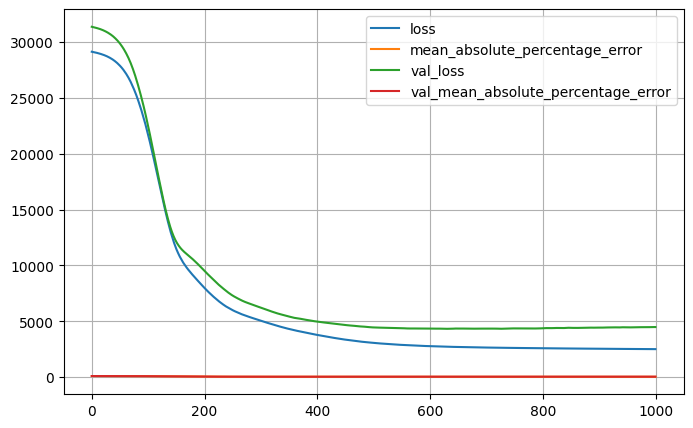

In [63]:
# Sequential Keras

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.losses import MeanSquaredError

feedforward_nn = Sequential([
    Input(shape=[10]),
    Dense(9, activation="swish"),
    Dense(7, activation="relu"),
    Dense(7, activation="relu"),
    Dense(1, activation="linear")
])

feedforward_nn.compile(loss=MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=["mean_absolute_percentage_error"])

tensorboard_callback = keras.callbacks.TensorBoard(run_logdir)
history = feedforward_nn.fit(X_train, y_train, epochs=1000, batch_size=256, validation_data=(X_cv, y_cv), callbacks=[tensorboard_callback])

plotHistory(history)

In [65]:
# Functional Keras

from keras import layers


Epoch 1/800
1/1 [==============================] - 1s 511ms/step - loss: 29296.4785 - mean_absolute_percentage_error: 99.9844 - val_loss: 31547.7324 - val_mean_absolute_percentage_error: 99.9645
Epoch 2/800
1/1 [==============================] - 0s 23ms/step - loss: 29283.8555 - mean_absolute_percentage_error: 99.9445 - val_loss: 31531.8418 - val_mean_absolute_percentage_error: 99.9190
Epoch 3/800
1/1 [==============================] - 0s 23ms/step - loss: 29272.1582 - mean_absolute_percentage_error: 99.9052 - val_loss: 31516.3066 - val_mean_absolute_percentage_error: 99.8730
Epoch 4/800
1/1 [==============================] - 0s 23ms/step - loss: 29259.8379 - mean_absolute_percentage_error: 99.8634 - val_loss: 31499.4238 - val_mean_absolute_percentage_error: 99.8239
Epoch 5/800
1/1 [==============================] - 0s 24ms/step - loss: 29246.4414 - mean_absolute_percentage_error: 99.8180 - val_loss: 31483.0117 - val_mean_absolute_percentage_error: 99.7782
Epoch 6/800
1/1 [============

1/1 [==============================] - 0s 25ms/step - loss: 27206.7285 - mean_absolute_percentage_error: 93.8058 - val_loss: 29091.1875 - val_mean_absolute_percentage_error: 93.7190
Epoch 44/800
1/1 [==============================] - 0s 24ms/step - loss: 27081.4570 - mean_absolute_percentage_error: 93.4204 - val_loss: 28946.8750 - val_mean_absolute_percentage_error: 93.3462
Epoch 45/800
1/1 [==============================] - 0s 24ms/step - loss: 26950.9414 - mean_absolute_percentage_error: 93.0204 - val_loss: 28796.0059 - val_mean_absolute_percentage_error: 92.9578
Epoch 46/800
1/1 [==============================] - 0s 24ms/step - loss: 26815.0059 - mean_absolute_percentage_error: 92.6051 - val_loss: 28638.4199 - val_mean_absolute_percentage_error: 92.5528
Epoch 47/800
1/1 [==============================] - 0s 24ms/step - loss: 26673.4785 - mean_absolute_percentage_error: 92.1733 - val_loss: 28473.9863 - val_mean_absolute_percentage_error: 92.1305
Epoch 48/800
1/1 [====================

1/1 [==============================] - 0s 27ms/step - loss: 16744.7305 - mean_absolute_percentage_error: 61.9419 - val_loss: 17101.4492 - val_mean_absolute_percentage_error: 60.8922
Epoch 86/800
1/1 [==============================] - 0s 23ms/step - loss: 16390.6895 - mean_absolute_percentage_error: 61.0049 - val_loss: 16702.2188 - val_mean_absolute_percentage_error: 59.8520
Epoch 87/800
1/1 [==============================] - 0s 23ms/step - loss: 16035.7236 - mean_absolute_percentage_error: 60.1020 - val_loss: 16302.2441 - val_mean_absolute_percentage_error: 58.7913
Epoch 88/800
1/1 [==============================] - 0s 23ms/step - loss: 15680.2891 - mean_absolute_percentage_error: 59.2251 - val_loss: 15902.0586 - val_mean_absolute_percentage_error: 57.7105
Epoch 89/800
1/1 [==============================] - 0s 23ms/step - loss: 15324.8467 - mean_absolute_percentage_error: 58.3873 - val_loss: 15502.1934 - val_mean_absolute_percentage_error: 56.6236
Epoch 90/800
1/1 [====================

1/1 [==============================] - 0s 28ms/step - loss: 5036.0767 - mean_absolute_percentage_error: 37.6744 - val_loss: 5223.3247 - val_mean_absolute_percentage_error: 36.2098
Epoch 128/800
1/1 [==============================] - 0s 27ms/step - loss: 4891.6929 - mean_absolute_percentage_error: 36.8927 - val_loss: 5163.4302 - val_mean_absolute_percentage_error: 36.0324
Epoch 129/800
1/1 [==============================] - 0s 22ms/step - loss: 4761.3613 - mean_absolute_percentage_error: 36.2137 - val_loss: 5111.6372 - val_mean_absolute_percentage_error: 35.9430
Epoch 130/800
1/1 [==============================] - 0s 22ms/step - loss: 4643.7876 - mean_absolute_percentage_error: 35.6868 - val_loss: 5064.2935 - val_mean_absolute_percentage_error: 35.8976
Epoch 131/800
1/1 [==============================] - 0s 23ms/step - loss: 4536.4194 - mean_absolute_percentage_error: 35.2918 - val_loss: 5017.8472 - val_mean_absolute_percentage_error: 35.9176
Epoch 132/800
1/1 [=========================

1/1 [==============================] - 0s 24ms/step - loss: 3157.7942 - mean_absolute_percentage_error: 35.7059 - val_loss: 4404.6367 - val_mean_absolute_percentage_error: 39.7628
Epoch 170/800
1/1 [==============================] - 0s 24ms/step - loss: 3142.9968 - mean_absolute_percentage_error: 35.6165 - val_loss: 4395.6440 - val_mean_absolute_percentage_error: 39.7192
Epoch 171/800
1/1 [==============================] - 0s 24ms/step - loss: 3128.6838 - mean_absolute_percentage_error: 35.5191 - val_loss: 4387.2109 - val_mean_absolute_percentage_error: 39.6736
Epoch 172/800
1/1 [==============================] - 0s 24ms/step - loss: 3114.9050 - mean_absolute_percentage_error: 35.4205 - val_loss: 4378.9282 - val_mean_absolute_percentage_error: 39.6298
Epoch 173/800
1/1 [==============================] - 0s 28ms/step - loss: 3101.6672 - mean_absolute_percentage_error: 35.3261 - val_loss: 4370.4189 - val_mean_absolute_percentage_error: 39.5912
Epoch 174/800
1/1 [=========================

1/1 [==============================] - 0s 23ms/step - loss: 2815.8662 - mean_absolute_percentage_error: 35.0520 - val_loss: 4180.3081 - val_mean_absolute_percentage_error: 40.5204
Epoch 212/800
1/1 [==============================] - 0s 24ms/step - loss: 2811.6379 - mean_absolute_percentage_error: 35.0527 - val_loss: 4180.1216 - val_mean_absolute_percentage_error: 40.5608
Epoch 213/800
1/1 [==============================] - 0s 24ms/step - loss: 2807.5107 - mean_absolute_percentage_error: 35.0576 - val_loss: 4179.8169 - val_mean_absolute_percentage_error: 40.6023
Epoch 214/800
1/1 [==============================] - 0s 22ms/step - loss: 2803.4800 - mean_absolute_percentage_error: 35.0653 - val_loss: 4179.3843 - val_mean_absolute_percentage_error: 40.6449
Epoch 215/800
1/1 [==============================] - 0s 23ms/step - loss: 2799.5430 - mean_absolute_percentage_error: 35.0767 - val_loss: 4178.8315 - val_mean_absolute_percentage_error: 40.6884
Epoch 216/800
1/1 [=========================

1/1 [==============================] - 0s 24ms/step - loss: 2696.1345 - mean_absolute_percentage_error: 35.5330 - val_loss: 4183.8159 - val_mean_absolute_percentage_error: 41.7729
Epoch 254/800
1/1 [==============================] - 0s 26ms/step - loss: 2694.1672 - mean_absolute_percentage_error: 35.5411 - val_loss: 4184.0737 - val_mean_absolute_percentage_error: 41.7918
Epoch 255/800
1/1 [==============================] - 0s 26ms/step - loss: 2692.2212 - mean_absolute_percentage_error: 35.5488 - val_loss: 4184.3560 - val_mean_absolute_percentage_error: 41.8100
Epoch 256/800
1/1 [==============================] - 0s 25ms/step - loss: 2690.2954 - mean_absolute_percentage_error: 35.5558 - val_loss: 4184.6680 - val_mean_absolute_percentage_error: 41.8276
Epoch 257/800
1/1 [==============================] - 0s 24ms/step - loss: 2688.3882 - mean_absolute_percentage_error: 35.5622 - val_loss: 4185.0083 - val_mean_absolute_percentage_error: 41.8446
Epoch 258/800
1/1 [=========================

1/1 [==============================] - 0s 22ms/step - loss: 2610.9519 - mean_absolute_percentage_error: 35.3749 - val_loss: 4187.0747 - val_mean_absolute_percentage_error: 42.6771
Epoch 296/800
1/1 [==============================] - 0s 24ms/step - loss: 2608.8867 - mean_absolute_percentage_error: 35.3466 - val_loss: 4188.0518 - val_mean_absolute_percentage_error: 42.6887
Epoch 297/800
1/1 [==============================] - 0s 23ms/step - loss: 2606.8569 - mean_absolute_percentage_error: 35.3059 - val_loss: 4189.6479 - val_mean_absolute_percentage_error: 42.6920
Epoch 298/800
1/1 [==============================] - 0s 23ms/step - loss: 2604.8777 - mean_absolute_percentage_error: 35.2587 - val_loss: 4191.4863 - val_mean_absolute_percentage_error: 42.6937
Epoch 299/800
1/1 [==============================] - 0s 21ms/step - loss: 2602.9443 - mean_absolute_percentage_error: 35.2111 - val_loss: 4193.2207 - val_mean_absolute_percentage_error: 42.6997
Epoch 300/800
1/1 [=========================

1/1 [==============================] - 0s 24ms/step - loss: 2524.9058 - mean_absolute_percentage_error: 34.6756 - val_loss: 4240.7974 - val_mean_absolute_percentage_error: 43.3630
Epoch 338/800
1/1 [==============================] - 0s 27ms/step - loss: 2523.0466 - mean_absolute_percentage_error: 34.6562 - val_loss: 4242.6748 - val_mean_absolute_percentage_error: 43.3689
Epoch 339/800
1/1 [==============================] - 0s 26ms/step - loss: 2521.2092 - mean_absolute_percentage_error: 34.6349 - val_loss: 4244.6548 - val_mean_absolute_percentage_error: 43.3797
Epoch 340/800
1/1 [==============================] - 0s 25ms/step - loss: 2519.3945 - mean_absolute_percentage_error: 34.6129 - val_loss: 4246.6748 - val_mean_absolute_percentage_error: 43.4050
Epoch 341/800
1/1 [==============================] - 0s 24ms/step - loss: 2517.6013 - mean_absolute_percentage_error: 34.5999 - val_loss: 4248.6816 - val_mean_absolute_percentage_error: 43.4323
Epoch 342/800
1/1 [=========================

1/1 [==============================] - 0s 24ms/step - loss: 2455.3906 - mean_absolute_percentage_error: 34.3352 - val_loss: 4390.7397 - val_mean_absolute_percentage_error: 45.1260
Epoch 380/800
1/1 [==============================] - 0s 22ms/step - loss: 2453.8022 - mean_absolute_percentage_error: 34.3304 - val_loss: 4392.5864 - val_mean_absolute_percentage_error: 45.1508
Epoch 381/800
1/1 [==============================] - 0s 23ms/step - loss: 2452.2402 - mean_absolute_percentage_error: 34.3287 - val_loss: 4395.2388 - val_mean_absolute_percentage_error: 45.1784
Epoch 382/800
1/1 [==============================] - 0s 23ms/step - loss: 2450.6970 - mean_absolute_percentage_error: 34.3217 - val_loss: 4398.9351 - val_mean_absolute_percentage_error: 45.2097
Epoch 383/800
1/1 [==============================] - 0s 23ms/step - loss: 2449.1470 - mean_absolute_percentage_error: 34.3059 - val_loss: 4402.3540 - val_mean_absolute_percentage_error: 45.2374
Epoch 384/800
1/1 [=========================

1/1 [==============================] - 0s 23ms/step - loss: 2299.5894 - mean_absolute_percentage_error: 32.5261 - val_loss: 4466.9966 - val_mean_absolute_percentage_error: 46.1032
Epoch 422/800
1/1 [==============================] - 0s 22ms/step - loss: 2295.9590 - mean_absolute_percentage_error: 32.4699 - val_loss: 4458.6567 - val_mean_absolute_percentage_error: 46.1012
Epoch 423/800
1/1 [==============================] - 0s 24ms/step - loss: 2292.6885 - mean_absolute_percentage_error: 32.4486 - val_loss: 4457.1255 - val_mean_absolute_percentage_error: 46.1683
Epoch 424/800
1/1 [==============================] - 0s 23ms/step - loss: 2288.6829 - mean_absolute_percentage_error: 32.4113 - val_loss: 4462.2070 - val_mean_absolute_percentage_error: 46.2887
Epoch 425/800
1/1 [==============================] - 0s 22ms/step - loss: 2284.1936 - mean_absolute_percentage_error: 32.3487 - val_loss: 4471.3564 - val_mean_absolute_percentage_error: 46.4246
Epoch 426/800
1/1 [=========================

1/1 [==============================] - 0s 26ms/step - loss: 2025.3479 - mean_absolute_percentage_error: 29.9245 - val_loss: 4436.1870 - val_mean_absolute_percentage_error: 47.2898
Epoch 464/800
1/1 [==============================] - 0s 23ms/step - loss: 2019.6799 - mean_absolute_percentage_error: 29.8939 - val_loss: 4434.1680 - val_mean_absolute_percentage_error: 47.3241
Epoch 465/800
1/1 [==============================] - 0s 22ms/step - loss: 2015.1838 - mean_absolute_percentage_error: 29.8585 - val_loss: 4423.1436 - val_mean_absolute_percentage_error: 47.3085
Epoch 466/800
1/1 [==============================] - 0s 22ms/step - loss: 2011.4520 - mean_absolute_percentage_error: 29.8206 - val_loss: 4422.9224 - val_mean_absolute_percentage_error: 47.3350
Epoch 467/800
1/1 [==============================] - 0s 23ms/step - loss: 2007.3297 - mean_absolute_percentage_error: 29.7979 - val_loss: 4437.6562 - val_mean_absolute_percentage_error: 47.4320
Epoch 468/800
1/1 [=========================

1/1 [==============================] - 0s 23ms/step - loss: 1861.3157 - mean_absolute_percentage_error: 27.6849 - val_loss: 4417.7739 - val_mean_absolute_percentage_error: 47.4511
Epoch 506/800
1/1 [==============================] - 0s 23ms/step - loss: 1858.0211 - mean_absolute_percentage_error: 27.6359 - val_loss: 4417.2622 - val_mean_absolute_percentage_error: 47.4340
Epoch 507/800
1/1 [==============================] - 0s 23ms/step - loss: 1854.7952 - mean_absolute_percentage_error: 27.5804 - val_loss: 4417.4956 - val_mean_absolute_percentage_error: 47.4268
Epoch 508/800
1/1 [==============================] - 0s 24ms/step - loss: 1851.6890 - mean_absolute_percentage_error: 27.5169 - val_loss: 4420.9487 - val_mean_absolute_percentage_error: 47.4504
Epoch 509/800
1/1 [==============================] - 0s 26ms/step - loss: 1848.6879 - mean_absolute_percentage_error: 27.4525 - val_loss: 4421.0659 - val_mean_absolute_percentage_error: 47.4452
Epoch 510/800
1/1 [=========================

1/1 [==============================] - 0s 27ms/step - loss: 1768.2716 - mean_absolute_percentage_error: 26.7082 - val_loss: 4523.0815 - val_mean_absolute_percentage_error: 48.5995
Epoch 548/800
1/1 [==============================] - 0s 25ms/step - loss: 1766.5272 - mean_absolute_percentage_error: 26.6300 - val_loss: 4521.0376 - val_mean_absolute_percentage_error: 48.5831
Epoch 549/800
1/1 [==============================] - 0s 25ms/step - loss: 1764.7373 - mean_absolute_percentage_error: 26.6050 - val_loss: 4524.5513 - val_mean_absolute_percentage_error: 48.6163
Epoch 550/800
1/1 [==============================] - 0s 24ms/step - loss: 1763.1342 - mean_absolute_percentage_error: 26.5767 - val_loss: 4531.2939 - val_mean_absolute_percentage_error: 48.6763
Epoch 551/800
1/1 [==============================] - 0s 24ms/step - loss: 1761.7141 - mean_absolute_percentage_error: 26.5729 - val_loss: 4528.1001 - val_mean_absolute_percentage_error: 48.6501
Epoch 552/800
1/1 [=========================

1/1 [==============================] - 0s 22ms/step - loss: 1710.2601 - mean_absolute_percentage_error: 25.9467 - val_loss: 4627.7188 - val_mean_absolute_percentage_error: 49.3985
Epoch 590/800
1/1 [==============================] - 0s 23ms/step - loss: 1708.9930 - mean_absolute_percentage_error: 25.9695 - val_loss: 4622.6514 - val_mean_absolute_percentage_error: 49.3566
Epoch 591/800
1/1 [==============================] - 0s 23ms/step - loss: 1707.8384 - mean_absolute_percentage_error: 25.9956 - val_loss: 4633.5278 - val_mean_absolute_percentage_error: 49.4488
Epoch 592/800
1/1 [==============================] - 0s 22ms/step - loss: 1706.2212 - mean_absolute_percentage_error: 26.0368 - val_loss: 4624.9233 - val_mean_absolute_percentage_error: 49.3776
Epoch 593/800
1/1 [==============================] - 0s 22ms/step - loss: 1704.1772 - mean_absolute_percentage_error: 25.9848 - val_loss: 4636.5576 - val_mean_absolute_percentage_error: 49.4754
Epoch 594/800
1/1 [=========================

1/1 [==============================] - 0s 22ms/step - loss: 1648.4501 - mean_absolute_percentage_error: 25.6389 - val_loss: 4738.2974 - val_mean_absolute_percentage_error: 50.3274
Epoch 632/800
1/1 [==============================] - 0s 22ms/step - loss: 1645.7969 - mean_absolute_percentage_error: 25.4552 - val_loss: 4704.9839 - val_mean_absolute_percentage_error: 50.1025
Epoch 633/800
1/1 [==============================] - 0s 22ms/step - loss: 1646.6741 - mean_absolute_percentage_error: 25.5934 - val_loss: 4755.7627 - val_mean_absolute_percentage_error: 50.4406
Epoch 634/800
1/1 [==============================] - 0s 22ms/step - loss: 1645.3071 - mean_absolute_percentage_error: 25.5110 - val_loss: 4742.7183 - val_mean_absolute_percentage_error: 50.3627
Epoch 635/800
1/1 [==============================] - 0s 22ms/step - loss: 1641.4248 - mean_absolute_percentage_error: 25.1552 - val_loss: 4719.0464 - val_mean_absolute_percentage_error: 50.2051
Epoch 636/800
1/1 [=========================

1/1 [==============================] - 0s 24ms/step - loss: 1605.4164 - mean_absolute_percentage_error: 24.7461 - val_loss: 4845.3037 - val_mean_absolute_percentage_error: 51.2273
Epoch 674/800
1/1 [==============================] - 0s 23ms/step - loss: 1604.4607 - mean_absolute_percentage_error: 24.7451 - val_loss: 4856.8784 - val_mean_absolute_percentage_error: 51.2897
Epoch 675/800
1/1 [==============================] - 0s 22ms/step - loss: 1603.4679 - mean_absolute_percentage_error: 24.6999 - val_loss: 4846.5503 - val_mean_absolute_percentage_error: 51.2322
Epoch 676/800
1/1 [==============================] - 0s 23ms/step - loss: 1602.4464 - mean_absolute_percentage_error: 24.6977 - val_loss: 4853.3374 - val_mean_absolute_percentage_error: 51.2726
Epoch 677/800
1/1 [==============================] - 0s 22ms/step - loss: 1601.4229 - mean_absolute_percentage_error: 24.6871 - val_loss: 4850.7368 - val_mean_absolute_percentage_error: 51.2616
Epoch 678/800
1/1 [=========================

1/1 [==============================] - 0s 22ms/step - loss: 1568.5028 - mean_absolute_percentage_error: 24.2658 - val_loss: 4947.3574 - val_mean_absolute_percentage_error: 51.6354
Epoch 716/800
1/1 [==============================] - 0s 22ms/step - loss: 1567.9235 - mean_absolute_percentage_error: 24.3065 - val_loss: 4915.8057 - val_mean_absolute_percentage_error: 51.4835
Epoch 717/800
1/1 [==============================] - 0s 22ms/step - loss: 1566.9828 - mean_absolute_percentage_error: 24.2745 - val_loss: 4943.1948 - val_mean_absolute_percentage_error: 51.6242
Epoch 718/800
1/1 [==============================] - 0s 22ms/step - loss: 1565.9655 - mean_absolute_percentage_error: 24.1657 - val_loss: 4930.7964 - val_mean_absolute_percentage_error: 51.5567
Epoch 719/800
1/1 [==============================] - 0s 22ms/step - loss: 1565.1194 - mean_absolute_percentage_error: 24.0937 - val_loss: 4929.0425 - val_mean_absolute_percentage_error: 51.5533
Epoch 720/800
1/1 [=========================

1/1 [==============================] - 0s 23ms/step - loss: 1538.5153 - mean_absolute_percentage_error: 24.0048 - val_loss: 5001.8340 - val_mean_absolute_percentage_error: 52.3113
Epoch 758/800
1/1 [==============================] - 0s 25ms/step - loss: 1538.1815 - mean_absolute_percentage_error: 24.0695 - val_loss: 5010.5044 - val_mean_absolute_percentage_error: 52.3098
Epoch 759/800
1/1 [==============================] - 0s 25ms/step - loss: 1538.0255 - mean_absolute_percentage_error: 24.1881 - val_loss: 4997.5942 - val_mean_absolute_percentage_error: 52.3299
Epoch 760/800
1/1 [==============================] - 0s 23ms/step - loss: 1537.4847 - mean_absolute_percentage_error: 24.1714 - val_loss: 5012.8794 - val_mean_absolute_percentage_error: 52.3570
Epoch 761/800
1/1 [==============================] - 0s 24ms/step - loss: 1536.9406 - mean_absolute_percentage_error: 24.1935 - val_loss: 5001.1729 - val_mean_absolute_percentage_error: 52.3602
Epoch 762/800
1/1 [=========================

1/1 [==============================] - 0s 25ms/step - loss: 1509.5542 - mean_absolute_percentage_error: 23.7650 - val_loss: 5061.7095 - val_mean_absolute_percentage_error: 52.8030
Epoch 800/800
1/1 [==============================] - 0s 25ms/step - loss: 1509.1882 - mean_absolute_percentage_error: 23.8392 - val_loss: 5057.4639 - val_mean_absolute_percentage_error: 52.8397


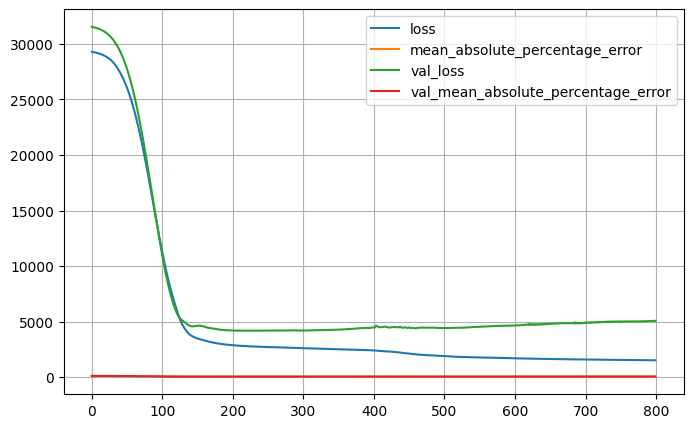

In [77]:
# Subclass Keras

from subclass_model import FunnelModel

def funnelsplit(X, splitIndex): return (X[:, :splitIndex], X[:, splitIndex:])

splitdex = 5
(X_trainA, X_trainB) = funnelsplit(X_train, splitdex)
(X_cvA, X_cvB) = funnelsplit(X_cv, splitdex)

funnel_nn = FunnelModel(
    hidden_layers=[
        (10, "swish"),
        (3, "tanh"),
        (3, "relu"),
        (2, "relu")
    ],
    output_layers=[(1, "linear")]
)

funnel_nn.compile(loss=MeanSquaredError(), optimizer=tf.optimizers.Adam(learning_rate=0.01), metrics=["mean_absolute_percentage_error"])

funnelhistory = funnel_nn.fit((X_trainA, X_trainB), y_train, validation_data=((X_cvA, X_cvB), y_cv), batch_size=512, epochs=800, callbacks=[tensorboard_callback])
plotHistory(funnelhistory)

In [69]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, max_depth=10)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [70]:
from sklearn.metrics import mean_squared_error

print(f"sgd error: {mean_squared_error(y_cv, sgd_model.predict(X_cv))}")
print(f"svr error: {mean_squared_error(y_cv, svr.predict(X_cv))}")
print(f"xgboost error: {mean_squared_error(y_cv, xgb_model.predict(X_cv))}")
print(f"feedforward neural network error (1,000 epochs training): {mean_squared_error(y_cv, feedforward_nn.predict(X_cv))}")
print(f"funnel neural network error (1,000 epochs training): {mean_squared_error(y_cv, funnel_nn.predict((X_cvA, X_cvB)))}")

sgd error: 2.2997123324810709e+24
svr error: 4068.225473068061
xgboost error: 5849.50337696576
2/2 [==============================] - 0s 1ms/step
feedforward neural network error (1,000 epochs training): 4486.677979000223
2/2 [==============================] - 0s 2ms/step
funnel neural network error (1,000 epochs training): 4284.633100845073


In [40]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgb_search_space = {
    "n_estimators": [128, 200, 300, 500],
    "gamma": [0.001, 0.01, 0.1],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1]
}

GS = GridSearchCV(estimator=xgb_model, 
                  param_grid=xgb_search_space, 
                  scoring=["r2", "neg_mean_squared_error"],
                  refit="neg_mean_squared_error",
                  cv=5,
                  verbose=4)

GS.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END gamma=0.001, learning_rate=0.0001, n_estimators=128; neg_mean_squared_error: (test=-27863.533) r2: (test=-4.497) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.0001, n_estimators=128; neg_mean_squared_error: (test=-29365.842) r2: (test=-3.599) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.0001, n_estimators=128; neg_mean_squared_error: (test=-31517.503) r2: (test=-4.075) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.0001, n_estimators=128; neg_mean_squared_error: (test=-30152.588) r2: (test=-3.582) total time=   0.0s
[CV 5/5] END gamma=0.001, learning_rate=0.0001, n_estimators=128; neg_mean_squared_error: (test=-22378.325) r2: (test=-3.718) total time=   0.0s
[CV 1/5] END gamma=0.001, learning_rate=0.0001, n_estimators=200; neg_mean_squared_error: (test=-27539.298) r2: (test=-4.433) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.0001, n_estimators=200; ne

[CV 3/5] END gamma=0.001, learning_rate=0.01, n_estimators=500; neg_mean_squared_error: (test=-4560.605) r2: (test=0.266) total time=   0.2s
[CV 4/5] END gamma=0.001, learning_rate=0.01, n_estimators=500; neg_mean_squared_error: (test=-5922.643) r2: (test=0.100) total time=   0.2s
[CV 5/5] END gamma=0.001, learning_rate=0.01, n_estimators=500; neg_mean_squared_error: (test=-4084.027) r2: (test=0.139) total time=   0.2s
[CV 1/5] END gamma=0.001, learning_rate=0.1, n_estimators=128; neg_mean_squared_error: (test=-3374.009) r2: (test=0.334) total time=   0.0s
[CV 2/5] END gamma=0.001, learning_rate=0.1, n_estimators=128; neg_mean_squared_error: (test=-4595.397) r2: (test=0.280) total time=   0.0s
[CV 3/5] END gamma=0.001, learning_rate=0.1, n_estimators=128; neg_mean_squared_error: (test=-4294.884) r2: (test=0.308) total time=   0.0s
[CV 4/5] END gamma=0.001, learning_rate=0.1, n_estimators=128; neg_mean_squared_error: (test=-5692.763) r2: (test=0.135) total time=   0.0s
[CV 5/5] END gamm

[CV 3/5] END gamma=0.01, learning_rate=0.0001, n_estimators=500; neg_mean_squared_error: (test=-29633.196) r2: (test=-3.772) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.0001, n_estimators=500; neg_mean_squared_error: (test=-28457.945) r2: (test=-3.324) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.0001, n_estimators=500; neg_mean_squared_error: (test=-21016.082) r2: (test=-3.431) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=0.001, n_estimators=128; neg_mean_squared_error: (test=-23103.086) r2: (test=-3.558) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, n_estimators=128; neg_mean_squared_error: (test=-24525.266) r2: (test=-2.841) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, n_estimators=128; neg_mean_squared_error: (test=-26163.671) r2: (test=-3.213) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, n_estimators=128; neg_mean_squared_error: (test=-25326.385) r2: (test=-2.848) total time=   0

[CV 2/5] END gamma=0.01, learning_rate=0.1, n_estimators=500; neg_mean_squared_error: (test=-4602.710) r2: (test=0.279) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.1, n_estimators=500; neg_mean_squared_error: (test=-4307.666) r2: (test=0.306) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.1, n_estimators=500; neg_mean_squared_error: (test=-5697.597) r2: (test=0.134) total time=   0.2s
[CV 5/5] END gamma=0.01, learning_rate=0.1, n_estimators=500; neg_mean_squared_error: (test=-4324.332) r2: (test=0.088) total time=   0.2s
[CV 1/5] END gamma=0.01, learning_rate=1, n_estimators=128; neg_mean_squared_error: (test=-4864.456) r2: (test=0.040) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, n_estimators=128; neg_mean_squared_error: (test=-6761.269) r2: (test=-0.059) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=1, n_estimators=128; neg_mean_squared_error: (test=-6443.960) r2: (test=-0.038) total time=   0.0s
[CV 4/5] END gamma=0.01, learni

[CV 1/5] END gamma=0.1, learning_rate=0.001, n_estimators=500; neg_mean_squared_error: (test=-13481.628) r2: (test=-1.660) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.001, n_estimators=500; neg_mean_squared_error: (test=-14260.714) r2: (test=-1.233) total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.001, n_estimators=500; neg_mean_squared_error: (test=-15470.111) r2: (test=-1.491) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.001, n_estimators=500; neg_mean_squared_error: (test=-15380.726) r2: (test=-1.337) total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.001, n_estimators=500; neg_mean_squared_error: (test=-10975.124) r2: (test=-1.314) total time=   0.2s
[CV 1/5] END gamma=0.1, learning_rate=0.01, n_estimators=128; neg_mean_squared_error: (test=-6105.201) r2: (test=-0.204) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.01, n_estimators=128; neg_mean_squared_error: (test=-6700.789) r2: (test=-0.049) total time=   0.0s
[CV 3/5] E

[CV 1/5] END gamma=0.1, learning_rate=1, n_estimators=500; neg_mean_squared_error: (test=-4844.276) r2: (test=0.044) total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=1, n_estimators=500; neg_mean_squared_error: (test=-6622.423) r2: (test=-0.037) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=1, n_estimators=500; neg_mean_squared_error: (test=-6448.413) r2: (test=-0.038) total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=1, n_estimators=500; neg_mean_squared_error: (test=-7263.631) r2: (test=-0.104) total time=   0.2s
[CV 5/5] END gamma=0.1, learning_rate=1, n_estimators=500; neg_mean_squared_error: (test=-5782.487) r2: (test=-0.219) total time=   0.2s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=200,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             param_grid={'gamma': [0.001, 0.01, 0.1],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [128, 200, 300, 500]},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [54]:
GS.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.001, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [55]:
GS.best_params_

{'gamma': 0.001, 'learning_rate': 0.01, 'n_estimators': 500}

In [56]:
optimal_xgb = GS.best_estimator_

print(f"optimal xgboost error: {mean_squared_error(y_cv, optimal_xgb.predict(X_cv))}")

optimal xgboost error: 3975.485433483835
